In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/yogini/Downloads/Traffic_Violations.csv')
#df.head()
#df['Date Of Stop'].max()
#df.columns.values.tolist()#
d1=df.dropna()

train, test = train_test_split(d1, test_size = 0.2)


In [19]:
train.describe()

,Latitude,Longitude,Year
count,112668.000000,112668.000000,112668.000000
mean,39.083697,-77.113385,2006.094774
std,0.066950,0.092804,66.936677
min,38.502245,-77.732257,0.000000
25%,39.037848,-77.195376,2003.000000
50%,39.073478,-77.095433,2007.000000
75%,39.133479,-77.047890,2012.000000
max,39.914737,-76.346121,8042.000000


In [17]:
pd.crosstab(train['Belts'],train['Property Damage'])

Property Damage,No,Yes
Belts,,
No,106466,2108
Yes,3732,362


In [18]:
pd.crosstab(train['Alcohol'],train['Property Damage'])


Property Damage,No,Yes
Alcohol,,
No,110022,2464
Yes,176,6


In [24]:
pd.crosstab(train['Personal Injury'],train['Property Damage'])
#t.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Property Damage,No,Yes
Personal Injury,,
No,108671,2470
Yes,1527,0


In [25]:
pd.crosstab(train['Fatal'],train['Property Damage'])


Property Damage,No,Yes
Fatal,,
No,110194,2470
Yes,4,0


In [30]:
pd.crosstab(train['HAZMAT'],train['Property Damage'])


Property Damage,No,Yes
HAZMAT,,
No,110187,2470
Yes,11,0


In [31]:
pd.crosstab(train['VehicleType'],train['Property Damage'])

Property Damage,No,Yes
VehicleType,,
01 - Motorcycle,1183,24
02 - Automobile,98684,2185
03 - Station Wagon,1566,18
04 - Limousine,59,2
05 - Light Duty Truck,5817,128
06 - Heavy Duty Truck,788,32
07 - Truck/Road Tractor,75,4
08 - Recreational Vehicle,201,3
09 - Farm Vehicle,6,0


In [32]:
pd.crosstab(train['Race'],train['Property Damage'])

Property Damage,No,Yes
Race,,
ASIAN,6447,159
BLACK,35260,666
HISPANIC,25462,736
NATIVE AMERICAN,224,11
OTHER,6396,114
WHITE,36409,784


In [33]:
pd.crosstab(train['Gender'],train['Property Damage'])


Property Damage,No,Yes
Gender,,
F,35611,708
M,74512,1762
U,75,0


In [34]:
d=train.groupby(['Accident'])
print d['Accident'].size()

Accident
No    112668
dtype: int64


In [35]:
pd.crosstab(train['Property Damage'],train['Violation Type'],rownames=['Property Damage'],colnames=['Violation Type'])

Violation Type,Citation,Warning
Property Damage,,
No,51883,58315
Yes,2257,213


In [36]:
pd.crosstab(train['Alcohol'],train['Personal Injury'],rownames=['Alcohol'],colnames=['Personal Injury'])

Personal Injury,No,Yes
Alcohol,,
No,110964,1522
Yes,177,5


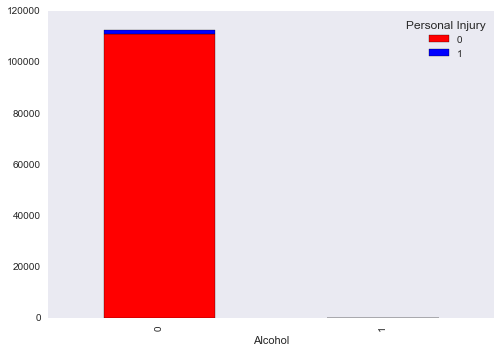

In [44]:
t=pd.crosstab(train['Alcohol'],train['Personal Injury'],rownames=['Alcohol'],colnames=['Personal Injury'])
t.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [37]:
train.Belts.replace(['No', 'Yes'], [0, 1], inplace=True)
train.Accident.replace(['No', 'Yes'], [0, 1], inplace=True)
train['Contributed To Accident'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Property Damage'].replace(['No', 'Yes',''], [0, 1,0], inplace=True)
train['HAZMAT'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Commercial Vehicle'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Alcohol'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Work Zone'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Personal Injury'].replace(['No', 'Yes',''], [0, 1,0], inplace=True)

//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [42]:
train['Property Damage'].head()

37784     0
87525     0
31785     0
21838     0
134170    0
Name: Property Damage, dtype: int64

In [43]:
train.groupby(['Belts']).size()

Belts
0    108574
1      4094
dtype: int64

In [50]:
train['Date Of Stop'].head()

37784     11/01/2016
87525     07/22/2016
31785     10/21/2016
21838     10/04/2016
134170    07/26/2016
Name: Date Of Stop, dtype: object

In [52]:
train['Time Of Stop'].head()

37784     21:14:00
87525     08:57:00
31785     10:59:00
21838     00:35:00
134170    20:21:00
Name: Time Of Stop, dtype: object

In [53]:
train.groupby(['Belts']).size()

Belts
0    108574
1      4094
dtype: int64

In [54]:
train['Date_Of_Stop'] = train['Date Of Stop'].astype('datetime64[ns]')

ValueError: Error parsing datetime string "11/08/2016" at position 2